In [1]:
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import numpy as np

In [2]:
data=pd.read_csv("chat_dataset.csv")

In [3]:
data.describe()
# data.sentiment.value_counts()

,message,sentiment
count,584,584
unique,546,3
top,I have no opinion on this,neutral
freq,5,259


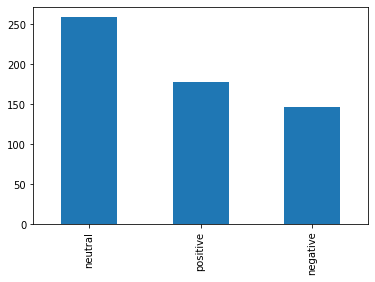

In [4]:
data.sentiment.value_counts().plot(kind='bar')
plt.show()

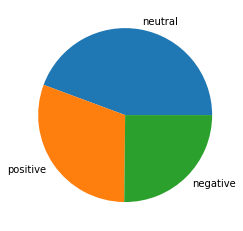

In [5]:
plt.pie(data.sentiment.value_counts(),labels=data.sentiment.value_counts().index)
# plt.legend()
plt.show()

In [6]:
vectorizer=CountVectorizer(stop_words="english")

In [7]:
feature=vectorizer.fit_transform(data.message)

In [8]:
feature.shape

(584, 567)

In [9]:
feature.count_nonzero()

1784

In [10]:
X_train,X_test,y_train,y_test=train_test_split(feature,np.array(data.sentiment),test_size=0.2)

In [11]:
model=LogisticRegression().fit(X_train,y_train)

In [12]:
model.score(X_test,y_test)

0.8205128205128205

In [13]:
model.predict(X_test[0])

array(['neutral'], dtype=object)

In [14]:
y_test[0]

'neutral'

In [15]:
model2=LinearSVC().fit(X_train,y_train)

In [16]:
model2.score(X_test,y_test)

0.8632478632478633

In [17]:
test=["I can't believe how disappointed I am with the service at that restaurant. The food was tasteless and overpriced, and the staff was incredibly rude. I've never experienced such a terrible dining experience in my life. The restaurant's lack of attention to detail and poor customer service was appalling. I wouldn't recommend it to anyone","I recently visited a new café in town, and I was absolutely delighted with my experience. The café had a cozy atmosphere and a welcoming ambiance that made me feel right at home. The baristas were friendly and attentive, and they made the most delicious coffee I've ever tasted. The menu had a wide variety of mouthwatering pastries and sandwiches, all made with fresh ingredients. The attention to detail and quality of service were truly exceptional. I highly recommend this café to anyone looking for a fantastic coffee and dining experience."]
model2.predict(vectorizer.transform(test))

array(['negative', 'positive'], dtype=object)